### Desafio - Regressão Linear

## Sobre o desafio

Você é o administrador de uma fazenda que depende da irrigação para garantir a produtividade das culturas. Recentemente, você começou a registrar os dados de irrigação em um arquivo CSV, que contém informações sobre as horas de irrigação e a área irrigada correspondente por ângulo.

Seu objetivo é analisar esses dados para entender a relação entre o tempo de irrigação e a área efetivamente irrigada, permitindo otimizar os recursos hídricos da fazenda. Para isso, você decidiu utilizar um modelo de regressão linear para prever a área irrigada com base nas horas de irrigação.

**Tarefa:**

In [60]:
# Importando bibliotecas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.graphics.gofplots import qqplot
import pingouin as pg


1. **Carregar e Visualizar os Dados:**
    - Carregue os dados de irrigação a partir de um arquivo CSV.
    - Visualize os dados para entender a estrutura e as variáveis disponíveis.

In [6]:
# Criando Dataframe
df_irrigacao = pd.read_csv('./dados_de_irrigacao.csv')

In [10]:
# Visualizando 10 primeiras linhas do Dataframe, para validar a sua criação
df_irrigacao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [11]:
# Mostrar a estrutura ou schema do DataFrame e validar ausência de dados nulos e demais informações pertinentes
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


2. **Análise Exploratória dos Dados (EDA):**
    - Calcule as estatísticas descritivas das variáveis.
    - Crie gráficos de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo.
    - Analise a correlação entre as variáveis.

In [12]:
# Calcular as estatísticas descritivas das variáveis
df_irrigacao.describe()


,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

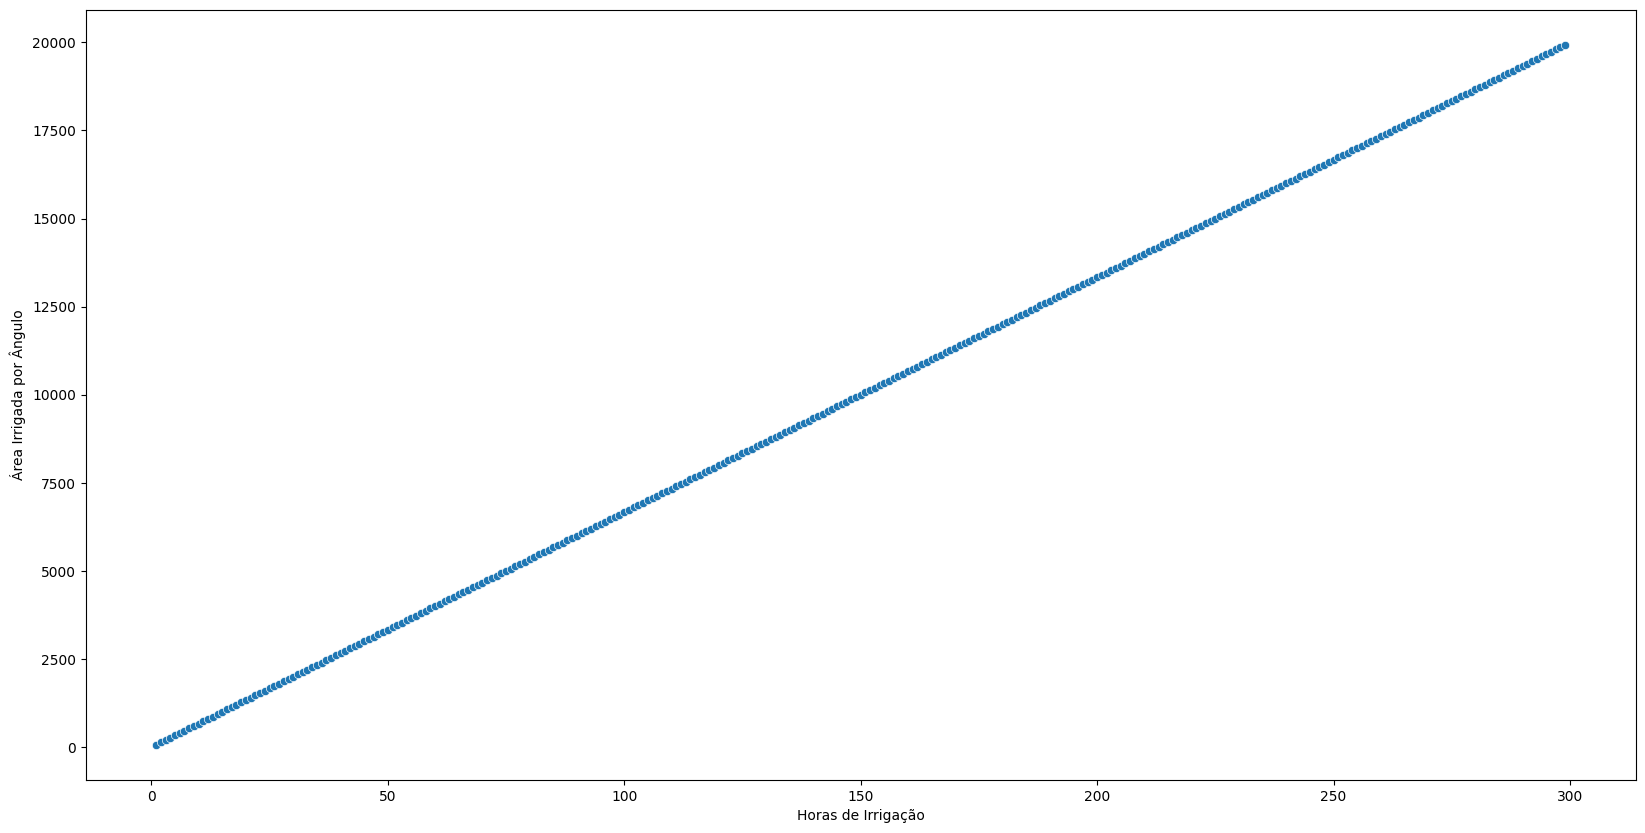

In [28]:
# Gráfico de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: >

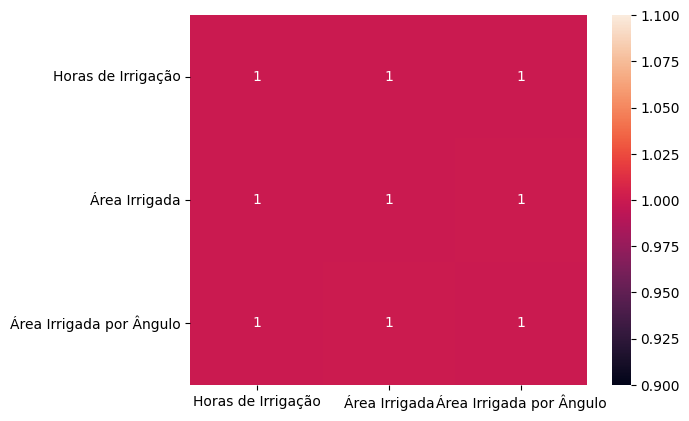

In [21]:
# Verificar correlação - Pearson
sns.heatmap(df_irrigacao.corr('pearson'), annot=True)

<Axes: >

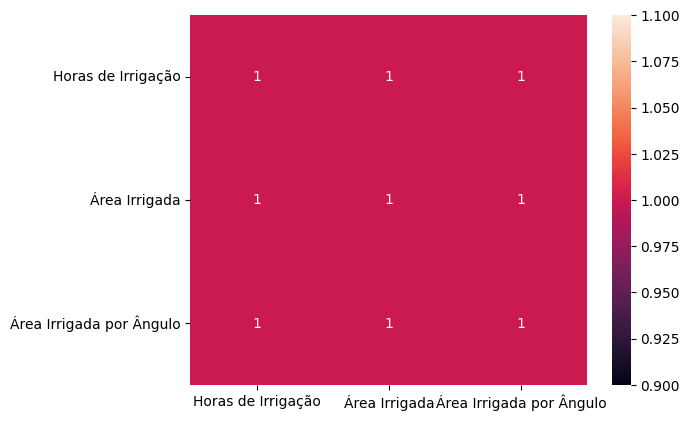

In [22]:
# Verificar correlação - Spearman
sns.heatmap(df_irrigacao.corr('spearman'), annot=True)

array([[<Axes: title={'center': 'Horas de Irrigação'}>,
        <Axes: title={'center': 'Área Irrigada'}>],
       [<Axes: title={'center': 'Área Irrigada por Ângulo'}>, <Axes: >]],
      dtype=object)

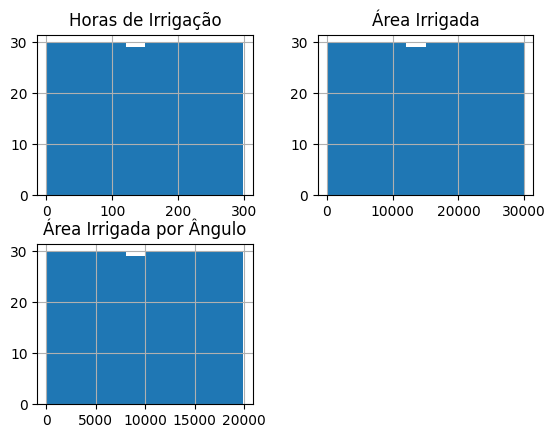

In [ ]:
# Histograma geral
df_irrigacao.hist()

3. **Construção do Modelo de Regressão Linear:**
    - Divida os dados em conjuntos de treino e teste.
    - Treine um modelo de regressão linear utilizando as horas de irrigação como variável independente (X) e a área irrigada por ângulo como variável dependente (Y).
    - Imprima a equação da reta obtida pelo modelo.

In [32]:
# Definindo dados de treinamento e teste
X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [33]:
# Instanciar o modelo a ser treinado
reg_model_irrigacao = LinearRegression()

In [34]:
# Treinar o modelo
reg_model_irrigacao.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model_irrigacao.coef_[0][0], reg_model_irrigacao.intercept_[0]))

A equação da reta é y = 66.666667x + 0.000000


4. **Avaliação do Modelo:**
    - Utilize as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo.
    - Visualize os resultados reais e preditos em um gráfico.

In [45]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model_irrigacao.predict(X_test)
y_pred

array([[ 4933.33333333],
       [ 6866.66666667],
       [10733.33333333],
       [ 9933.33333333],
       [ 1666.66666667],
       [12533.33333333],
       [18800.        ],
       [16000.        ],
       [ 2533.33333333],
       [18066.66666667],
       [18266.66666667],
       [16400.        ],
       [ 8200.        ],
       [18733.33333333],
       [10266.66666667],
       [ 5733.33333333],
       [11200.        ],
       [15933.33333333],
       [ 6600.        ],
       [ 4133.33333333],
       [ 5533.33333333],
       [ 1133.33333333],
       [ 8133.33333333],
       [12400.        ],
       [ 7266.66666667],
       [11933.33333333],
       [11533.33333333],
       [ 2666.66666667],
       [ 2333.33333333],
       [12000.        ],
       [ 4266.66666667],
       [16933.33333333],
       [ 1400.        ],
       [ 3266.66666667],
       [15000.        ],
       [12200.        ],
       [10000.        ],
       [18000.        ],
       [12800.        ],
       [11133.33333333],


In [43]:
# MSE = média (y_test - y_pred)2
mean_squared_error(y_test, y_pred)

5.0788674199138044e-24

In [44]:
# MAE = média (y_test - y_pred)
# Diferença entre o valor predito e o valor de teste
mean_absolute_error(y_test, y_pred)

1.8764644159495625e-12

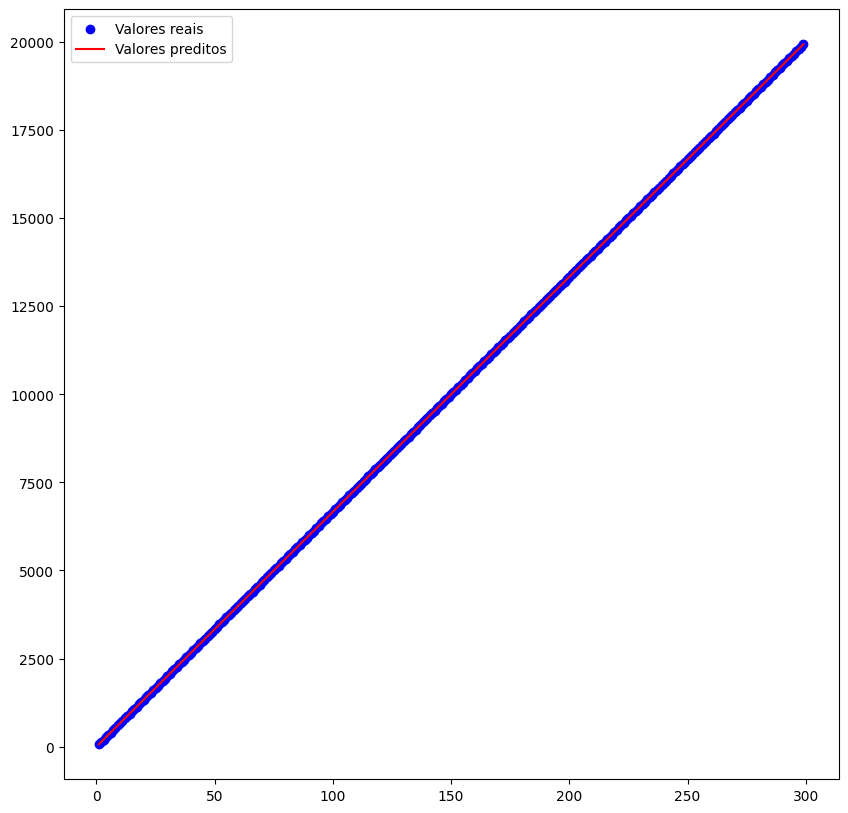

In [55]:
# Dados de teste x Dados preditos - MatplotLib
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='blue', label='Valores reais')
plt.plot(X, reg_model_irrigacao.predict(X), color='red', label='Valores preditos')
plt.legend()

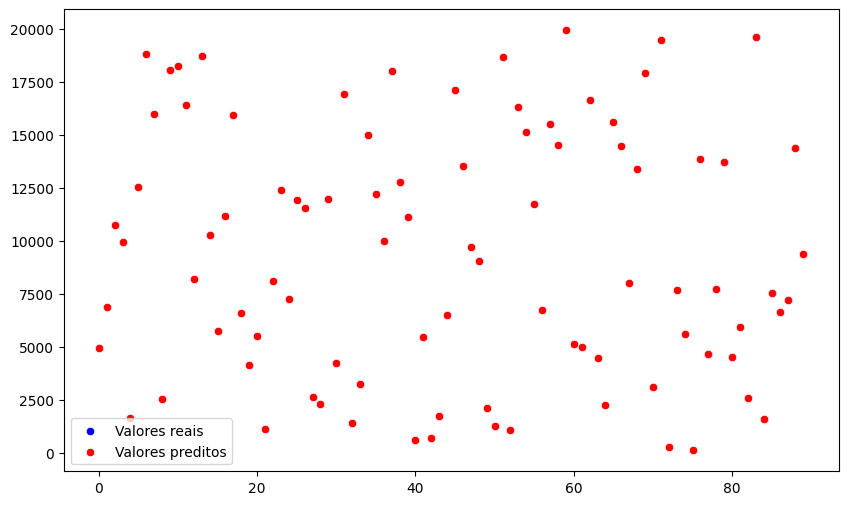

In [48]:
# Dados de teste x Dados preditos - Seaborn
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores preditos')
plt.legend()
plt.show()

5. **Análise de Resíduos:**
    - Calcule e analise os resíduos do modelo.
    - Verifique a normalidade dos resíduos utilizando testes estatísticos e gráficos.

In [57]:
# Residuos 
residuos = y_test - y_pred
residuos

array([[-1.81898940e-12],
       [-9.09494702e-13],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.95585778e-12],
       [ 1.81898940e-12],
       [ 3.63797881e-12],
       [ 1.81898940e-12],
       [-3.18323146e-12],
       [ 3.63797881e-12],
       [ 3.63797881e-12],
       [ 3.63797881e-12],
       [ 0.00000000e+00],
       [-3.63797881e-12],
       [ 0.00000000e+00],
       [-1.81898940e-12],
       [ 0.00000000e+00],
       [ 1.81898940e-12],
       [-9.09494702e-13],
       [-2.72848411e-12],
       [-1.81898940e-12],
       [-3.41060513e-12],
       [-9.09494702e-13],
       [ 0.00000000e+00],
       [-9.09494702e-13],
       [ 1.81898940e-12],
       [ 1.81898940e-12],
       [-2.72848411e-12],
       [-3.18323146e-12],
       [ 0.00000000e+00],
       [-1.81898940e-12],
       [ 0.00000000e+00],
       [-3.18323146e-12],
       [-2.72848411e-12],
       [ 1.81898940e-12],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 3.63797881e-12],
       [ 0.0

In [58]:
# Calcular os residuos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos_std

array([[-0.63133399],
       [-0.22052471],
       [ 0.19028458],
       [ 0.19028458],
       [-1.1448456 ],
       [ 1.01190315],
       [ 1.83352172],
       [ 1.01190315],
       [-1.24754792],
       [ 1.83352172],
       [ 1.83352172],
       [ 1.83352172],
       [ 0.19028458],
       [-1.45295257],
       [ 0.19028458],
       [-0.63133399],
       [ 0.19028458],
       [ 1.01190315],
       [-0.22052471],
       [-1.04214328],
       [-0.63133399],
       [-1.35025024],
       [-0.22052471],
       [ 0.19028458],
       [-0.22052471],
       [ 1.01190315],
       [ 1.01190315],
       [-1.04214328],
       [-1.24754792],
       [ 0.19028458],
       [-0.63133399],
       [ 0.19028458],
       [-1.24754792],
       [-1.04214328],
       [ 1.01190315],
       [ 0.19028458],
       [ 0.19028458],
       [ 1.83352172],
       [ 0.19028458],
       [ 1.01190315],
       [-1.35025024],
       [-0.63133399],
       [-1.29889908],
       [-1.24754792],
       [-0.63133399],
       [ 0

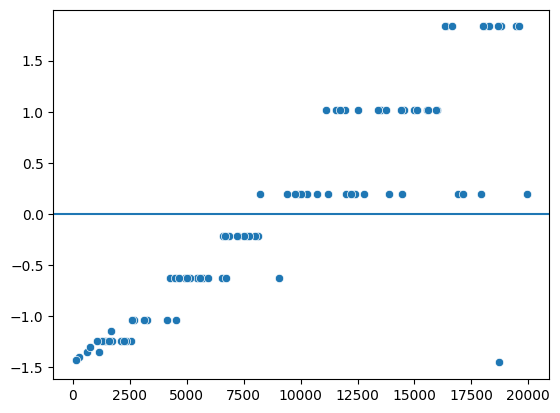

In [59]:
# Verificar linearidade do modelo
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

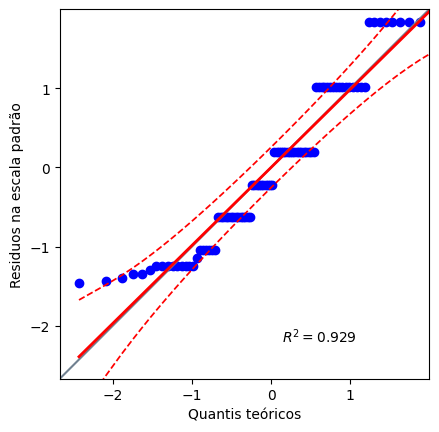

In [61]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma uma amostra segue uma distribuição normal
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [62]:
# Teste de normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-valor {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9188782351154261 e P-valor 3.150814299065697e-05


In [63]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-valor {}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.49999999999854866 e P-valor 2.4869515023142266e-21


6. **Predições de Exemplo:**
    - Utilize o modelo para fazer predições. Por exemplo, preveja a área irrigada por ângulo para 15 horas de irrigação.

In [64]:
# Predição da área irrigida por ângulo com base em 15 horas de irrigação
reg_model_irrigacao.predict([[15]])

array([[1000.]])

In [67]:
# Predição da área irrigida por ângulo com base em 290 horas de irrigação
reg_model_irrigacao.predict([[290]])

array([[19333.33333333]])